# Simple Linear Regression

📌simple linear regresyon: bir independent, bir dependent olacak

## Import Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
plt.rcParams["figure.figsize"] = (10,6) #figsize kullanmadan tum figurlerin boyunu sabitlemek icin
import warnings
warnings.filterwarnings('ignore')

## Read Dataset

In [3]:
df=pd.read_csv('Advertising.csv')
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


👆Datamiz,toplam reklam harcamalarina bagli olarak elde edilen satis tutarlarini iceriyor.

📌Supervised Learningde; supervised makineye future ve bir target verir ve verdigi futurelara istinaden targete en yakin degerleri vermesini bekler.

📌Biz burda Simple Linear Regrasyon kullanacagimiz icin bir future (independent) ve bir target (dependent) olmasi gerekir.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [7]:
df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


🔍Ilk bakista yapilabilecek bir analiz: Eger describe tablosunda; std ile mean arasindaki degerler birbirine cok yakinsa yada std meanden buyukse futurelarda outlier sorunu olabilir.Detali inceleme gerekebilir anlami cikarabiliriz..Ayni durum min ile %25 lik alanlar arasindada ciddi farklar var ise yine outlier sinyali olabilir.

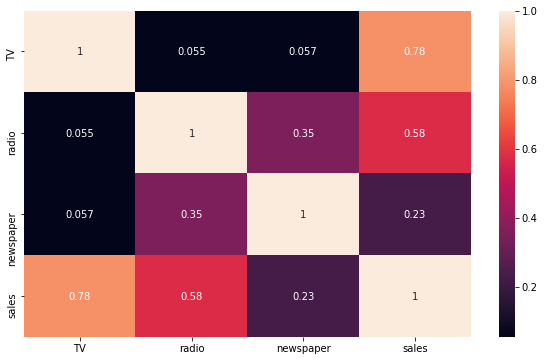

In [8]:
sns.heatmap(df.corr(), annot=True);

📌%75 ustu yuksek iliski, 50-75 moderate, 25-50 arasi zayif, 25 alti iliski yok olarak kabul edilir.
📌futures arasinda yuksek iliski varsa orda linear regresyon vardir diyebilirz.


## Create new independent variable (feature)

In [16]:
df['total_spend']=df.TV+ df.radio + df.newspaper

In [17]:
df.head()

,TV,radio,newspaper,sales,total_spend
0,230.1,37.8,69.2,22.1,337.1
1,44.5,39.3,45.1,10.4,128.9
2,17.2,45.9,69.3,9.3,132.4
3,151.5,41.3,58.5,18.5,251.3
4,180.8,10.8,58.4,12.9,250.0


## Which feature is more suitable for linear regression?

In [18]:
def check_dist(df,var):
    plt.subplot(1,2,1)
    sns.histplot(x=var, data=df)
    plt.subplot(1,2,2)
    stats.probplot(df[var], dist='norm', plot=plt)
    plt.show()

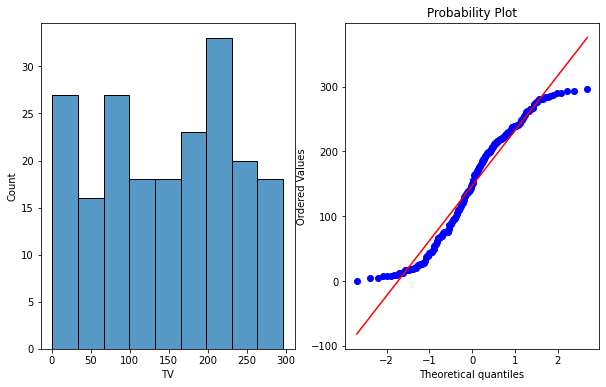

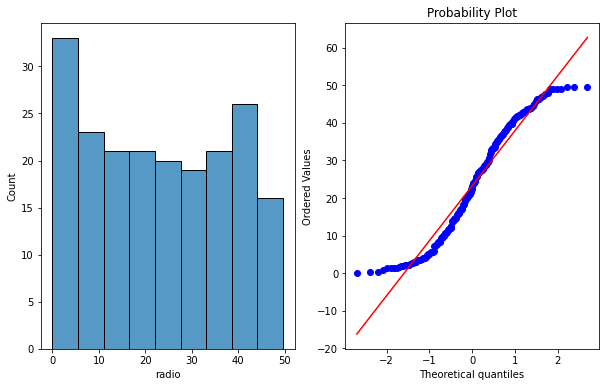

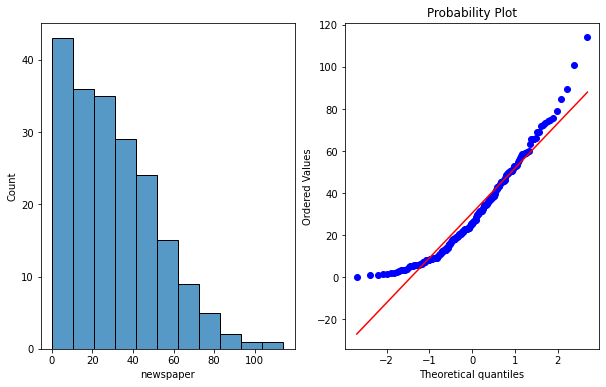

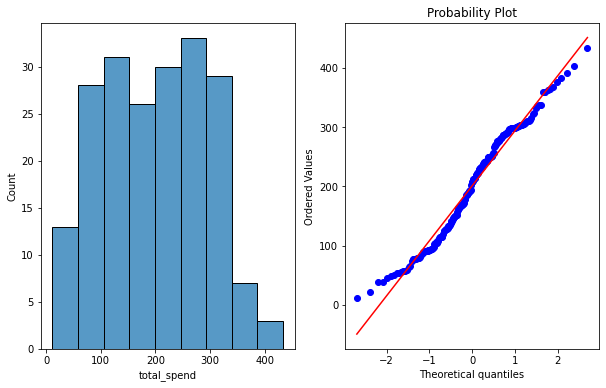

In [19]:
for col in df.drop('sales', axis=1).columns:
    check_dist(df, col)

📌futures ne kadar normal dagilima yakinsa ml safhasinda iyi sonuc alinabilir!!!
futures olabildigince normal dagilima yaklastirmaliyiz.   
📌ikinci grafikte ise line ne kadar degerlere sarmalanirsa o kadar guclu iliski vardir.

In [20]:
df=df[['total_spend', 'sales']]
df.head()

,total_spend,sales
0,337.1,22.1
1,128.9,10.4
2,132.4,9.3
3,251.3,18.5
4,250.0,12.9


## Plotting the relationship between independent variable and dependent variable 

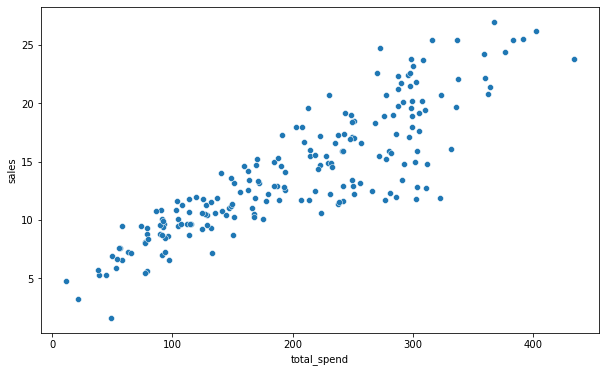

In [21]:
sns.scatterplot(x='total_spend', y='sales', data=df);

📌kuvvetli bir corr varsa linearty vardir diyebilirz.  
📌iliskimizin turu linerr olur

📌Corelasyonla linearty arsindaki farklar;
- Corelasyonda aralarindaki iliskiye ve kuvvetine bakar
- Linearty de etkiye tepki, birbirlerini ne kadar etkilediklerine bakar..

📌Oyle bir cizgi cizmeliyim ki buradaki butun verilere mumkun olan en yakin noktadan gecsin.Bunun sonucunda X i verdigimde y olarak en optimal sonuclari verebilsin.(ordinary least square)

📌Gercek dunyadaki verilerinin aynisina ulasmak mumkun degil, bu sekilde genelleme yapmaya calisiyoruz.bu nokta regresyon oluyor.Regresyonla aradigim besf fit line cizebilmek.

📌gercek degerle tahmin edilen degerler arasindaki farklarin karelerinin toplamini alip minimize etmeye calisiyoruz hangisinde bu deger en minimize ise benim best line bu diyor ve ciziyoruz.

## Correlation between independent variable and dependent variable

In [22]:
corr=df['sales'].corr(df.total_spend)
corr

0.8677123027017427

 🔍% 87 oraninda iliski var

## Coefficient of determination (R2)

In [15]:
R2_score = corr**2 #korelasyonun karesini alarak hesapliyoruz.bu formul simple linear regresion icin gecerli!
R2_score

0.7529246402599608

📌Elimdeki bagimsiz degisken ile bagimli degiskendeki varyansi(yani degisimi) %75 oraninda acikliyabiliyorum..

📌R2 scoru neyi ifade eder;elimizdeki veriler ile sales fiyatlari tahmin etmek icin gerekli olan bilginin %75 ine sahibim!!       

📌bu scor ne kadar buyukse mukemmele yakin tahminler yapabilirsin demek

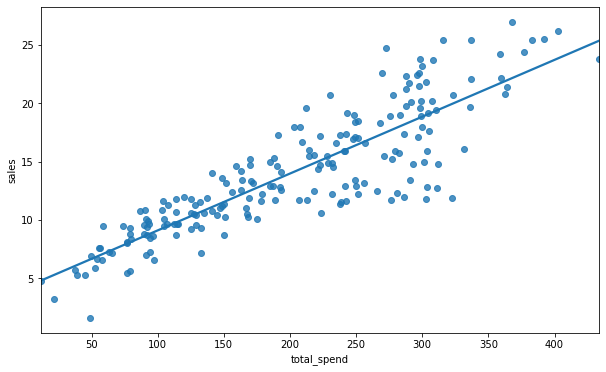

In [23]:
sns.regplot(data = df, x = 'total_spend', y = 'sales', ci=None);

📍Independent variables sayisi arttikca dependent variable i daha iyi tahmin edebiliyorum.Bu skor (R2) ne kadar buyuk olursa o kadar guzel tahminler yapar.

## Splitting the dataset into X(independent variables) and y (dependent variable)

In [17]:
# y= b1X + b0 --> LINEAR REGRESSION FORMULU

In [24]:
X= df["total_spend"]
y= df["sales"]

## Determination of coefficients (slope and intercept)

In [19]:
np.polyfit(X, y, deg=1)

array([0.04868788, 4.24302822])

## Why do we use the least squares error method to find the regression line that best fits the data?

In [26]:
b1=np.polyfit(X, y, deg=1)[0]
b0=np.polyfit(X, y, deg=1)[1]

predict = b1*X + b0

In [27]:
values = {'actual':y, 'predicted': predict, 'residual': y-predict, 'LSE':(y-predict)**2}
df_2=pd.DataFrame(values)
df_2

#residual: gercek degerle tahmin edilen deger arasindaki fark
#LSE : least squares error

,actual,predicted,residual,LSE
0,22.1,20.655712,1.444288,2.085967
1,10.4,10.518896,-0.118896,0.014136
2,9.3,10.689303,-1.389303,1.930164
3,18.5,16.478292,2.021708,4.087302
4,12.9,16.414998,-3.514998,12.355211
...,...,...,...,...
195,7.6,6.954943,0.645057,0.416098
196,9.7,9.462369,0.237631,0.056469
197,12.8,13.625183,-0.825183,0.680926
198,25.5,23.318939,2.181061,4.757026


In [31]:
df_2.residual.sum().round()

0.0

📌📌📌bir linear regression best fit line olarak cizilmisse her zaman residuallarin toplami sifir olacaktir.en iyi best fit line oldugunu residuallarin toplaminin sifir olup olmadigina bakarak anlayabilirz.

In [32]:
df_2.LSE.sum()

1338.4439761715594

## Prediction with simple linear regression

In [24]:
potential_spend = np.linspace(0,500,100) # NumPy linspace işlevi (bazen np. linspace olarak adlandırılır), Python'da sayısal diziler oluşturmak için kullanılan bir araçtır. NumPy dizisi olarak yapılandırılmış eşit aralıklı sayı dizileri oluşturması bakımından NumPy arange işlevine biraz benzer.
potential_spend

array([  0.        ,   5.05050505,  10.1010101 ,  15.15151515,
        20.2020202 ,  25.25252525,  30.3030303 ,  35.35353535,
        40.4040404 ,  45.45454545,  50.50505051,  55.55555556,
        60.60606061,  65.65656566,  70.70707071,  75.75757576,
        80.80808081,  85.85858586,  90.90909091,  95.95959596,
       101.01010101, 106.06060606, 111.11111111, 116.16161616,
       121.21212121, 126.26262626, 131.31313131, 136.36363636,
       141.41414141, 146.46464646, 151.51515152, 156.56565657,
       161.61616162, 166.66666667, 171.71717172, 176.76767677,
       181.81818182, 186.86868687, 191.91919192, 196.96969697,
       202.02020202, 207.07070707, 212.12121212, 217.17171717,
       222.22222222, 227.27272727, 232.32323232, 237.37373737,
       242.42424242, 247.47474747, 252.52525253, 257.57575758,
       262.62626263, 267.67676768, 272.72727273, 277.77777778,
       282.82828283, 287.87878788, 292.92929293, 297.97979798,
       303.03030303, 308.08080808, 313.13131313, 318.18

In [25]:
predicted_sales_lin = b1*potential_spend + b0
predicted_sales_lin

array([ 4.24302822,  4.4889266 ,  4.73482498,  4.98072336,  5.22662174,
        5.47252012,  5.7184185 ,  5.96431688,  6.21021526,  6.45611364,
        6.70201202,  6.9479104 ,  7.19380878,  7.43970716,  7.68560554,
        7.93150392,  8.1774023 ,  8.42330068,  8.66919906,  8.91509744,
        9.16099582,  9.4068942 ,  9.65279258,  9.89869097, 10.14458935,
       10.39048773, 10.63638611, 10.88228449, 11.12818287, 11.37408125,
       11.61997963, 11.86587801, 12.11177639, 12.35767477, 12.60357315,
       12.84947153, 13.09536991, 13.34126829, 13.58716667, 13.83306505,
       14.07896343, 14.32486181, 14.57076019, 14.81665857, 15.06255695,
       15.30845533, 15.55435371, 15.80025209, 16.04615048, 16.29204886,
       16.53794724, 16.78384562, 17.029744  , 17.27564238, 17.52154076,
       17.76743914, 18.01333752, 18.2592359 , 18.50513428, 18.75103266,
       18.99693104, 19.24282942, 19.4887278 , 19.73462618, 19.98052456,
       20.22642294, 20.47232132, 20.7182197 , 20.96411808, 21.21

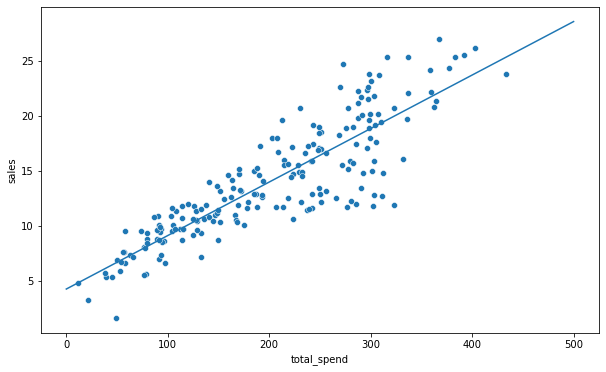

In [26]:
plt.plot(potential_spend, predicted_sales_lin)
sns.scatterplot(x='total_spend',y='sales',data=df);

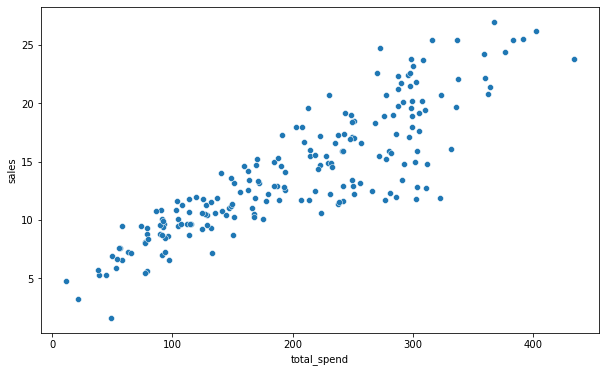

In [27]:
sns.scatterplot(x='total_spend',y='sales',data=df);

## Improving predictions

📌linear regresyonda degerleri dahada iyilestirme yolu nedir?
futures sayiyini artirarak yada yeni futurelar elde ederek, ama bir siniri var, amac feature minimize etmek

📌amac minimum future dan maximum skor elde etmek..

In [28]:
np.polyfit(X, y, deg=3)

array([ 3.07615033e-07, -1.89392449e-04,  8.20886302e-02,  2.70495053e+00])

In [29]:
# y= a3X**3 + a2X**2 + a1X**1 + a0

a3 = np.polyfit(X, y, deg =3)[0]
a2 = np.polyfit(X, y, deg =3)[1]
a1 = np.polyfit(X, y, deg =3)[2]
a0 = np.polyfit(X, y, deg =3)[3]
predicted_sales_poly = a3*potential_spend**3 + a2*potential_spend**2 + a1*potential_spend + a0
predicted_sales_poly

array([ 2.70495053,  3.11474825,  3.51512185,  3.90630911,  4.28854779,
        4.66207567,  5.02713052,  5.38395012,  5.73277224,  6.07383465,
        6.40737513,  6.73363145,  7.05284138,  7.3652427 ,  7.67107317,
        7.97057058,  8.2639727 ,  8.5515173 ,  8.83344215,  9.10998502,
        9.3813837 ,  9.64787595,  9.90969955, 10.16709227, 10.42029188,
       10.66953616, 10.91506287, 11.15710981, 11.39591473, 11.63171541,
       11.86474962, 12.09525514, 12.32346974, 12.5496312 , 12.77397728,
       12.99674577, 13.21817442, 13.43850103, 13.65796336, 13.87679918,
       14.09524627, 14.3135424 , 14.53192534, 14.75063288, 14.96990277,
       15.1899728 , 15.41108073, 15.63346435, 15.85736142, 16.08300973,
       16.31064703, 16.54051111, 16.77283973, 17.00787068, 17.24584172,
       17.48699063, 17.73155518, 17.97977315, 18.23188231, 18.48812043,
       18.74872528, 19.01393464, 19.28398629, 19.55911799, 19.83956752,
       20.12557265, 20.41737116, 20.71520081, 21.01929939, 21.32

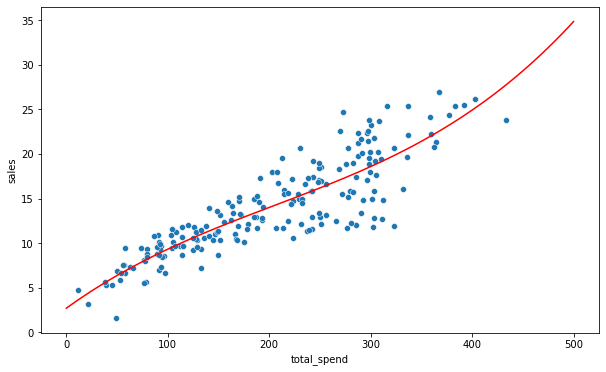

In [30]:
sns.scatterplot(x='total_spend',y='sales',data=df)
plt.plot(potential_spend, predicted_sales_poly, color ='red');

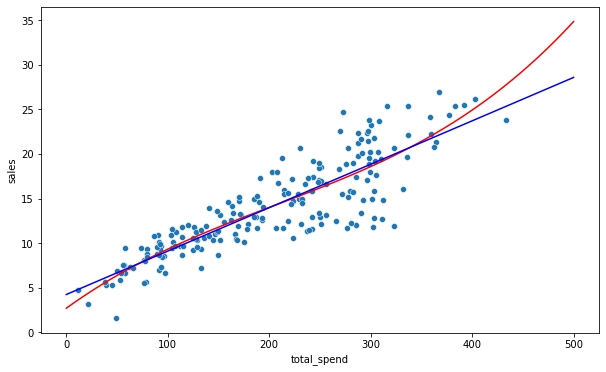

In [31]:
sns.scatterplot(x='total_spend',y='sales',data=df)
plt.plot(potential_spend, predicted_sales_poly, color='red')
plt.plot(potential_spend, predicted_sales_lin, color='blue')

(0.0, 10.0)

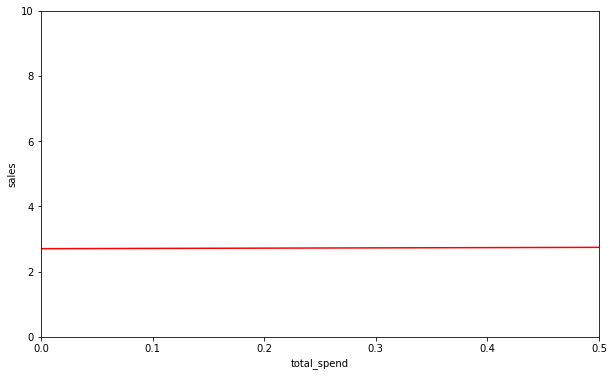

In [32]:
sns.scatterplot(x='total_spend',y='sales',data=df)
plt.plot(potential_spend, predicted_sales_poly,color='red')
plt.xlim(0, 0.5)
plt.ylim(0, 10)

In [33]:
#total_spend = 337.1, sales = 22.1
spend = 420
sales_pred_lin = b1*spend + b0
sales_pred_poly = a3*spend**3 + a2*spend**2 + a1*spend + a0
print(sales_pred_lin)
print(sales_pred_poly)

24.691937530036547
26.56392972637118
